In [ ]:
import sys
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from torchvision import transforms
import torchvision.models as models

In [ ]:
sys.path.append("/Users/harshit/Sites/projects/CSCI6505/")
print(sys.path)

['', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', '/Users/harshit/Sites/projects/CSCI6505/']


In [ ]:
model = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for child in model.children():
  print(type(child))

<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.batchnorm.BatchNorm2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.pooling.MaxPool2d'>
<class 'torch.nn.modules.container.Sequential'>
<class 'torch.nn.modules.container.Sequential'>
<class 'torch.nn.modules.container.Sequential'>
<class 'torch.nn.modules.container.Sequential'>
<class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>
<class 'torch.nn.modules.linear.Linear'>


In [ ]:
# we will save the conv layer weights in this list
model_weights =[]
# we will save the 49 conv layers in this list
conv_layers = []
# get all the model children as list
model_children = list(model.children())
# counter to keep count of the conv layers
counter = 0
# append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print("conv_layers")

Total convolution layers: 17
conv_layers


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)])

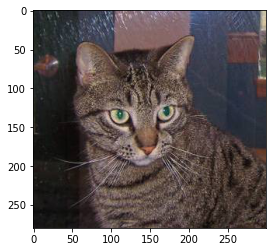

In [ ]:
image = Image.open(str("/content/cat.1.jpg"))
plt.imshow(image)

In [ ]:
image = transform(image)
print(f"Image shape before: {image.shape}")

image = image.unsqueeze(0)

print(f"Image shape after: {image.shape}")
image = image.to(device)

Image shape before: torch.Size([3, 280, 300])
Image shape after: torch.Size([1, 3, 280, 300])


In [ ]:
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))
#print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

17
torch.Size([1, 64, 140, 150])
torch.Size([1, 64, 140, 150])
torch.Size([1, 64, 140, 150])
torch.Size([1, 64, 140, 150])
torch.Size([1, 64, 140, 150])
torch.Size([1, 128, 70, 75])
torch.Size([1, 128, 70, 75])
torch.Size([1, 128, 70, 75])
torch.Size([1, 128, 70, 75])
torch.Size([1, 256, 35, 38])
torch.Size([1, 256, 35, 38])
torch.Size([1, 256, 35, 38])
torch.Size([1, 256, 35, 38])
torch.Size([1, 512, 18, 19])
torch.Size([1, 512, 18, 19])
torch.Size([1, 512, 18, 19])
torch.Size([1, 512, 18, 19])


In [ ]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(140, 150)
(140, 150)
(140, 150)
(140, 150)
(140, 150)
(70, 75)
(70, 75)
(70, 75)
(70, 75)
(35, 38)
(35, 38)
(35, 38)
(35, 38)
(18, 19)
(18, 19)
(18, 19)
(18, 19)


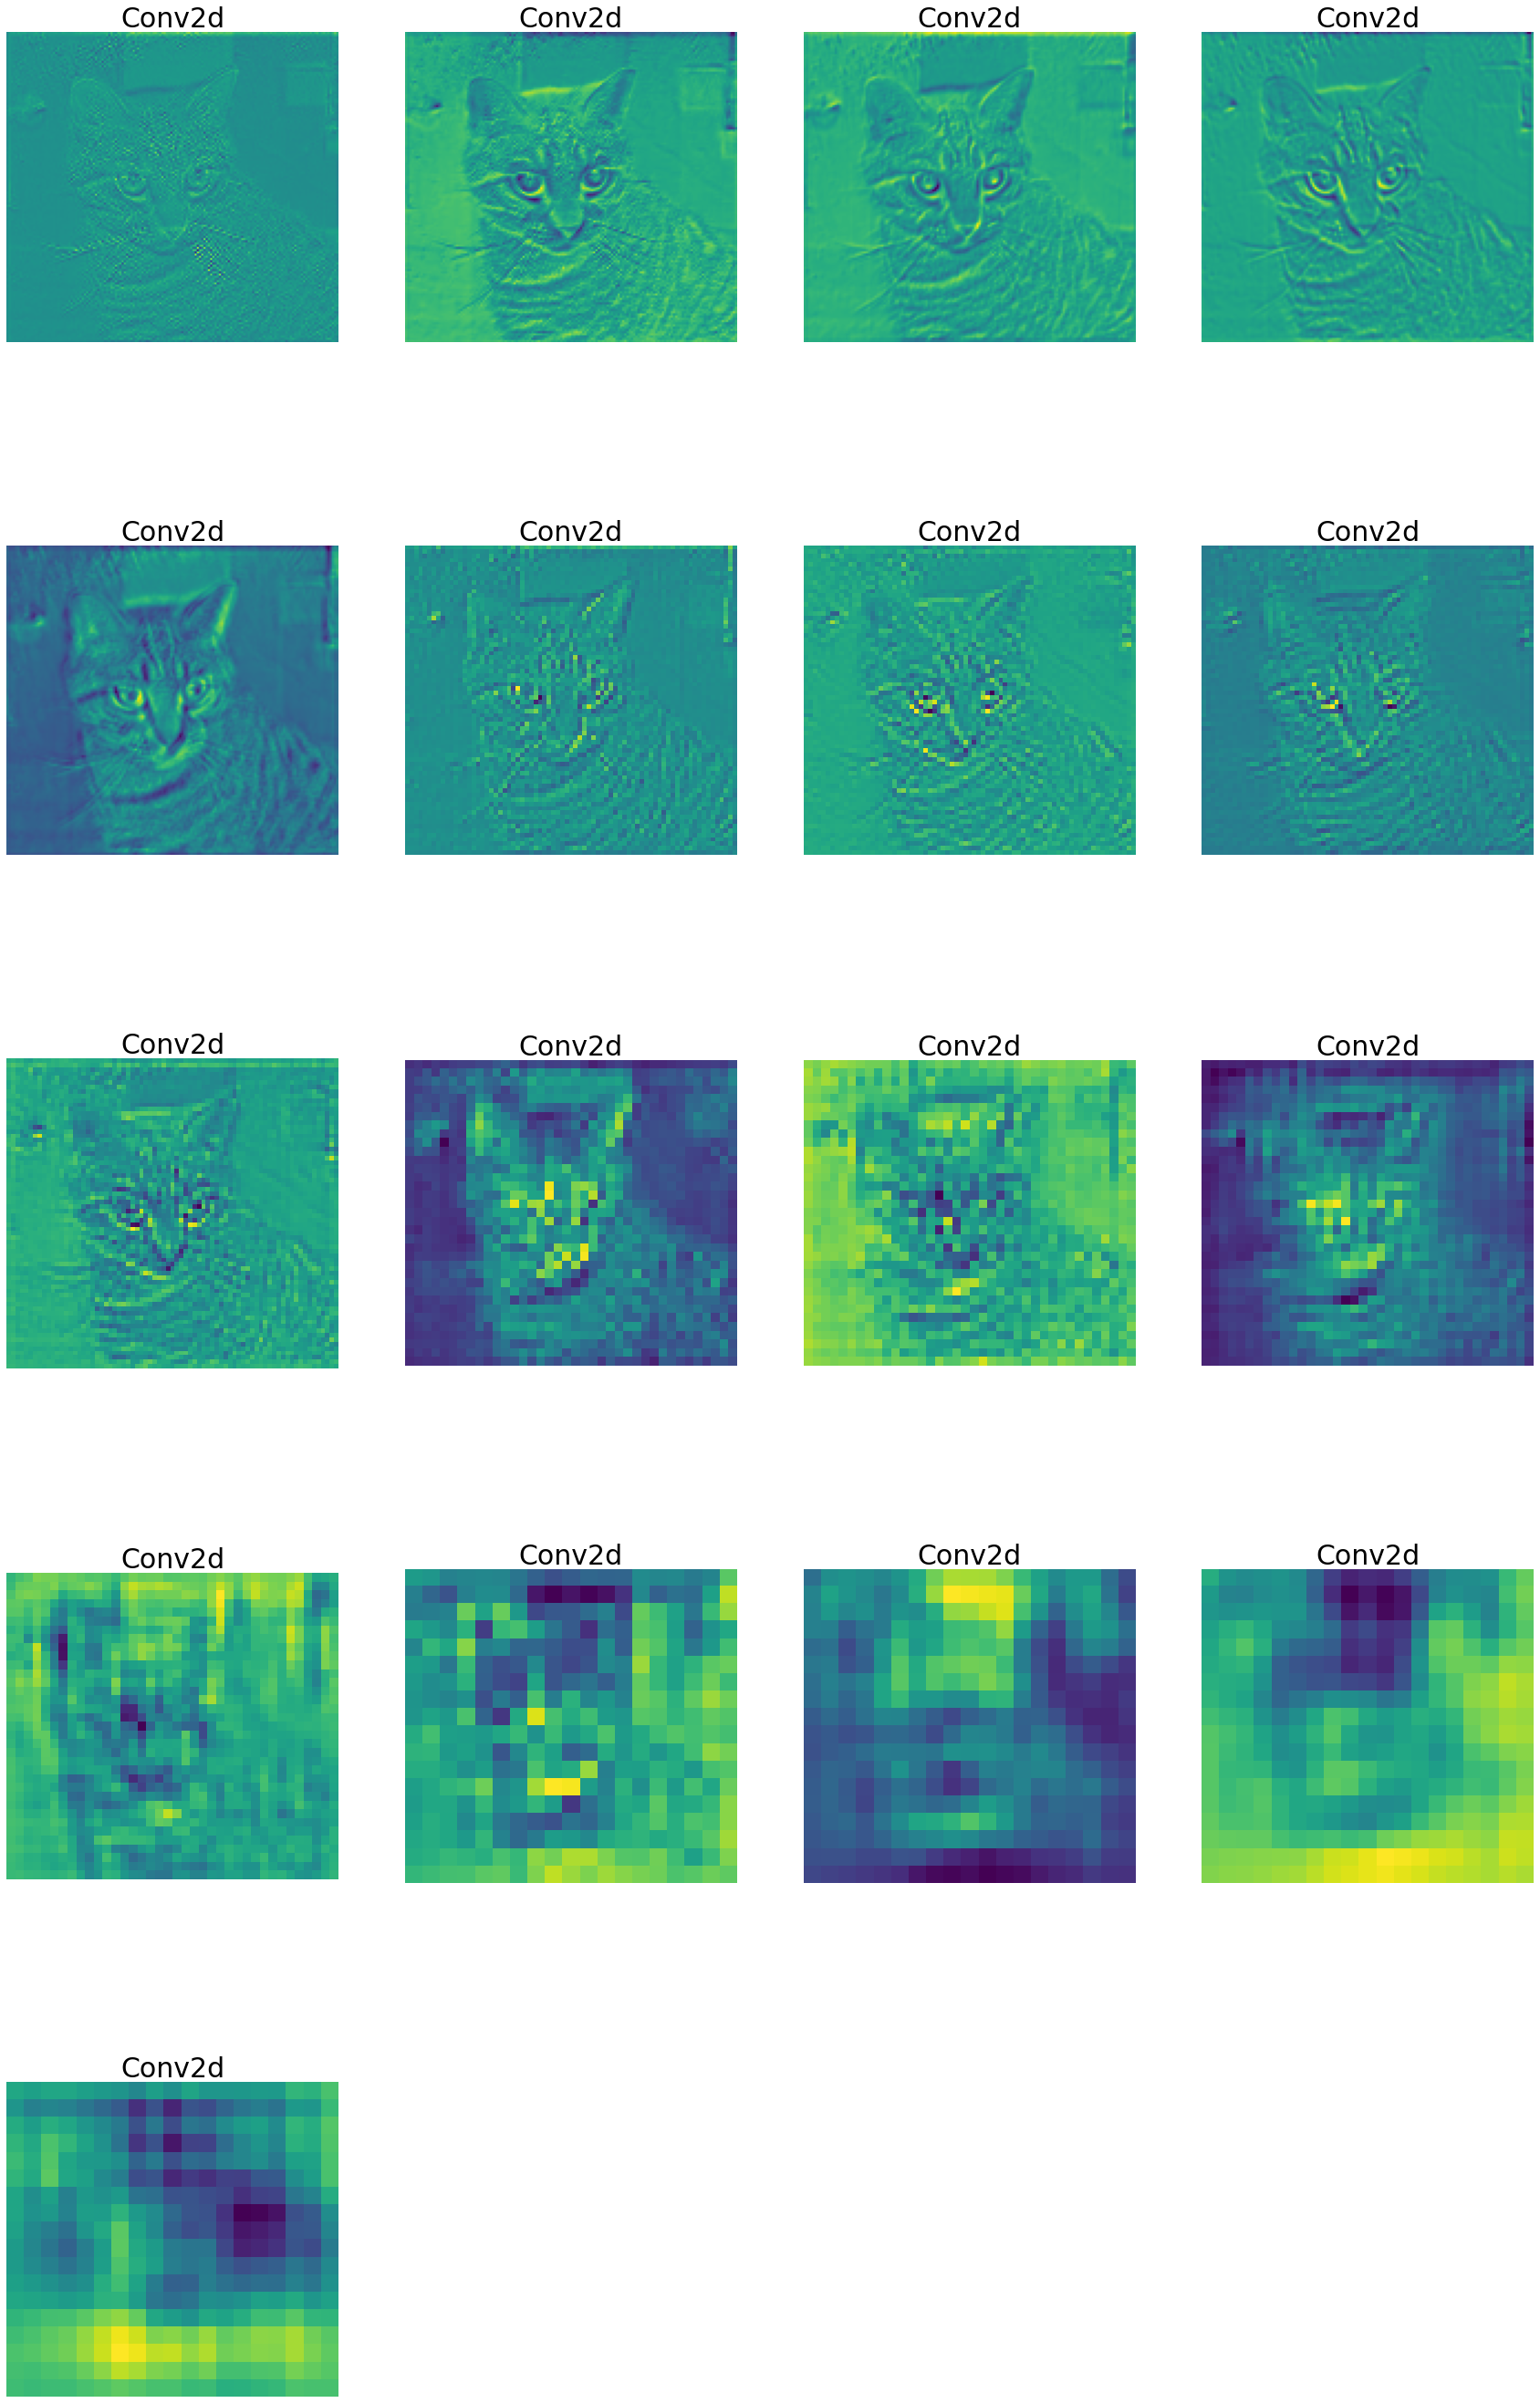

In [ ]:
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)
plt.savefig(str('feature_maps.jpg'), bbox_inches='tight')